#  Capstone Project - The Battle of Neighborhoods ( Week 2)

 <div class="alert alert-block alert-info" style="margin-top: 20px"> 
    
 ## Table of contents
    
1. [Introduction](#introduction)    
2. [Data Acquisition](#data)
3. [Methodology](#methodology)
4. [Data Acquisition](#data_acquisition)
5. [Analysis And Visualization](#data_analysis)
6. [Modelling](#model)
7. [Results and Prediction](#result)
8. [Conclusion](#conclusion)
9. [Further Development](#further)


## Introduction <a name ="introduction"></a>

**LIDL** is one of the cheapest super market in Europe but it's not represented in many European cities, specially in Scandinavian countries such as Denmark. Surprisingly, the last five years, **LIDL Group** have started to build several **LIDL Supermarket** in different regions of Denmark and specially the north of Denmark called **Nordjylland** in Danish language. Therefore, the purpose of this capstone project is to investigate and find out where the next **LIDL Supermarket** will be built in **Aalborg** the main city of **Nordjylland**.
The target audience is Aalborg Municipality or borough and the stakeholders are of course **LIDL Group**, the main competitors such as **Rema1000**, **Føtex**, **Fakta**, **ALDI** and **Aalborg City**

## Data <a name ="data"></a>

To Tackle or solve this problem, I will of course need a Dataset, which will find and locate all the existing  **Lidl** Supermarket and main competitors which already exist in Nordjylland region. I do not have an existing dataset for this problem. For that reason, **Foursquare API ** will be used in order to create a proper dataset that will be used to solve the problem. The dataset will certainly contain:
* All main competitors such as **Rema1000**, **Føtex**, **Fakta**, **ALDI**   and their location
* All the existing **LIDl** supermarket, their geographic location and the distance from the main city.
* Aalborg borough or neighborhood, the population and the number of person per km2.

## Methodology <a name ="methodology"></a>

Having explained the problem to solve and described the type of dataset that will be used, the next section will include the following steps:
* Acquisition of the data by using Foursqaure in our case;
* Present an overview of data
* Perform some exploratory Data Analysis (EDA) to find some pattern in dataset and have an idea of  what kind of useful Machine learning can be suitable  to solve problem
* Build a model
* Test and explain the result.

### Data  Acquition <a name ="data_acquisition"></a>

As mentioned in `Data` section, I do not have an existing dataset to solve the mentioned problem. To collect the necessary datasets, **Foursquare Api** will be used.

In order to define an instance of the geocoder, we need to define a `user_agent`. We will name our agent `foursquare_agent` and define the `address` and the `search_query`, which will be associated with a valid `Foursquare` developer credentials. The  user credentials and  Foursquare Api are in the following forms:

In [49]:
#CLIENT_ID = 'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
#VERSION = '20180604'
#LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

In order to find the location of a specific point of interst, the following code blocks have been used.

In [50]:
# This function will get the location of a specific region of interest POI.
def get_address(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)

Assuming that we are living in **Aalborg City** and we  need the near  **Rema1000** supermarket, one can use the following few of code to request the `json` file that contains the location of  all the near **Rema1000** supermarket.

In [52]:
address = 'Aalborg'
get_address(address) # Get the address of a specific point of interst
search_query = 'Rema1000'
radius =50000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

57.0482206 9.9193939


In order  to convert the `json` file  to `pandas DataFrame` and filter the venues, the following function can be used

In [53]:
def format_requests_result(results):
    # keep only columns that include venue name, and anything that is associated with location
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    dataframe_filtered = dataframe_filtered.drop(columns = ['formattedAddress','country', 'id','state', 'cc','labeledLatLngs'])
    return dataframe_filtered

After the above-mentioned steps, one can get the  final dataset that can be used to investigate and solve the problm. The final dataset that contains **Lidl** and it's competitors. 

In [54]:
df = rema_lidl_føtex_df.append(fakta_df, ignore_index= True, sort= False)
df.dropna( axis = 0, inplace = True)
df.sort_values('name', ascending = True)
df.head()

,name,categories,address,city,distance,lat,lng,postalCode
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220


### Data  Analysis and Visualization<a name ="data_analysis"></a>

After Data wrangling or Data munging, I will now perform some exploratory Data analysis (EDA) and visualization for a better understanding dataset and try to find which Machine Learning algorithm can be suitable to for this kind of problem.

In [55]:
df_num_of_supermarket = df.groupby(['name'])['postalCode'].count().reset_index()
df_num_of_supermarket

,name,postalCode
0,Fakta,26
1,Føtex,14
2,Lidl,9
3,REMA 1000,37


Surprisingly, after a simple grouping by postalCol I realized that there are more `REMA 1000` in Aalborg city than any other supermarket while there is only **9 Lidl** supermarket. To find out where they are located, one can perform the following query

In [56]:
lidl_filtered_df = df[df['name'] == 'Lidl']
lidl_filtered_df

,name,categories,address,city,distance,lat,lng,postalCode
41,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
45,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
46,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


One can read from the table above that there is only **One (1) Lidl** store in the main city **Aalborg**,**5 of the 8** remaining stores are located very far from Aalborg center. The reasons of this choice are multiples and We will enumerate some of them in next sections. One can also Visualize all supermarkets in **Nordjylland** 

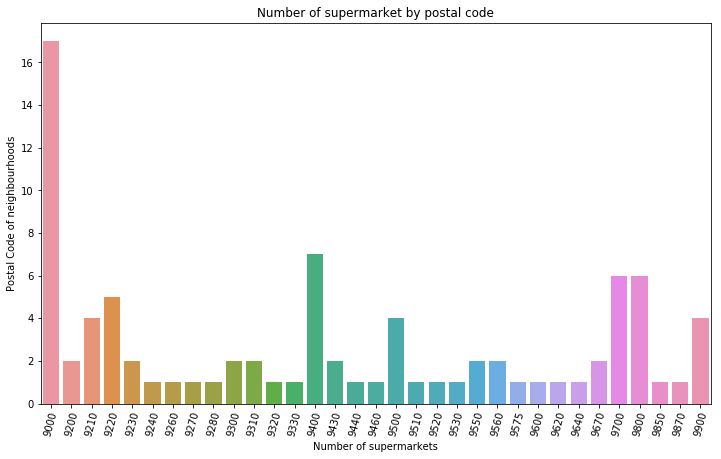

In [57]:
df_bar = df.groupby('postalCode')['name'].count().reset_index()
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
ax = sns.barplot(x = 'postalCode', y = 'name', data=df_bar)
ax.set(xlabel='Number of supermarkets', ylabel='Postal Code of neighbourhoods', title='Number of supermarket by postal code')
plt.show(ax)

Number of **LiDL**  in Aalbrog are presented in the following figure:

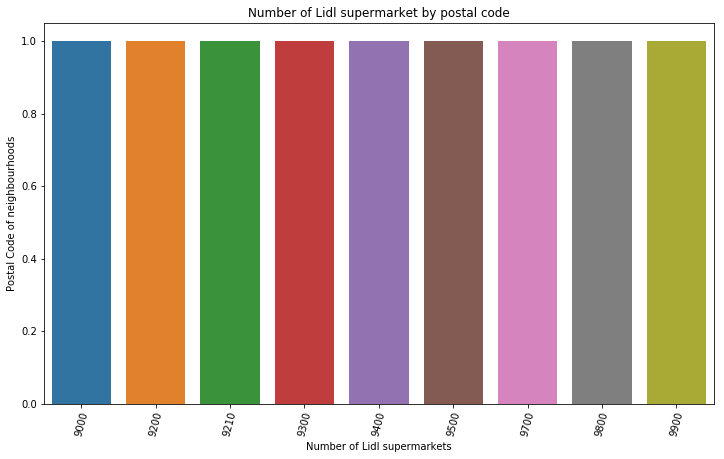

In [58]:
lidl_filtered_df = df[df['name'] == 'Lidl']
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
ax = sns.countplot(x = 'postalCode', data=lidl_filtered_df)
ax.set(xlabel='Number of Lidl supermarkets', ylabel='Postal Code of neighbourhoods', title='Number of Lidl supermarket by postal code')
plt.show(ax)

From this graph one can understand that **LIDL** have decided to build only one **Supermarket** per neighbourhood (by Postal code).The reason of this choice can be very difficult to understand specially where in main **City** where we can find only **One(1) LIDl** of 17.

The number of **supermarket** in Aalborg city.

In [59]:
df_9000 = df[df['postalCode'] == "9000"].groupby(['name'])['postalCode'].count().reset_index(inplace = False)
df_9000.sort_values('postalCode', ascending = False)

,name,postalCode
3,REMA 1000,6
0,Fakta,5
1,Føtex,5
2,Lidl,1


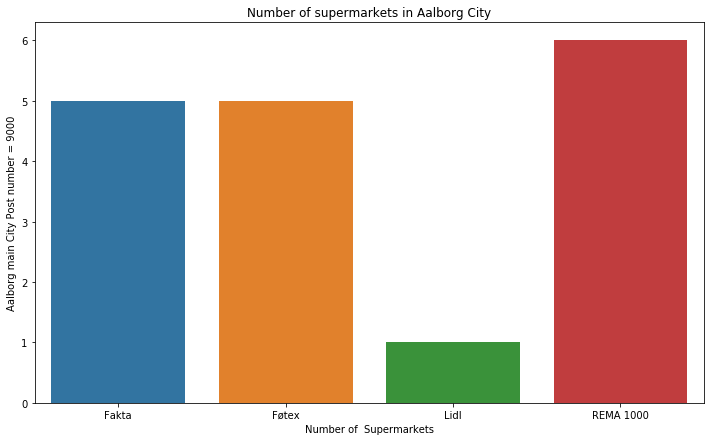

In [60]:
plt.figure(figsize=(12,7))
ax = sns.barplot( x = 'name', y= 'postalCode', data=df_9000)
ax.set(xlabel='Number of  Supermarkets', ylabel='Aalborg main City Post number = 9000', title='Number of supermarkets in Aalborg City')
plt.show(ax)

Now one can   Create a map of Aalborg with The Suppermarkets their locations and postalCode of neighbourhood  using **folium**

In [103]:
# create map of New York using latitude and longitude values
map_aalborg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(df['lat'], df['lng'], df['name'], df['address'], df['postalCode']):
    label = '{} ,{}, {}'.format(address, postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        tooltip = "Essai",      
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_aalborg)  
    
map_aalborg

Now we  try to isolate **Lidl** and see the different locations on map and the distance from the main  center **City Aalborg**

In [61]:
lidl_filtered_df = df[df['name'] == 'Lidl']
lidl_filtered_df

,name,categories,address,city,distance,lat,lng,postalCode
41,Lidl,Discount Store,Thistedvej 1d,Nørresundby,1753,57.063187,9.910343,9400
42,Lidl,Discount Store,Diskovej 3,Aalborg,3062,57.023636,9.942100,9210
43,Lidl,Discount Store,K Christensensvej 1 - 3,Aalborg,4116,57.013425,9.896384,9000
44,Lidl,Discount Store,Østergade 52,Brønderslev,24062,57.263749,9.949852,9700
45,Lidl,Discount Store,K. Christensens Vej 1,Aalborg SV,4138,57.013435,9.895280,9200
46,Lidl,Discount Store,Hostrupvej 68,Hobro,45469,56.645578,9.793760,9500
48,Lidl,Discount Store,Sæbygårdvej 29,Sæby,47406,57.333284,10.503293,9300
49,Lidl,Discount Store,Åstrupvej 2,Hjørring,45567,57.456340,9.977785,9800
51,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900


In [102]:
# create map of New York using latitude and longitude values
map_lidl = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address, postal_c, s_name in zip(lidl_filtered_df['lat'], lidl_filtered_df['lng'], lidl_filtered_df['name'], lidl_filtered_df['address'], lidl_filtered_df['postalCode']):
    label = '{}, {}, {}'.format(address, postal_c, s_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lidl)  
    
map_lidl

### Modelling  <a name ="model"></a>

Having a better understanding dataset, an unsupervised Machine learning is a suitable to find to solve this problem. Therefore, in next step, I will build  a **k-means** algorithm using the loaction data and the distance. For this purpose I will filter the dataset and use the following  methods

In [63]:
from sklearn.cluster import KMeans
kclusters = 4 #I choose the number of cluster to see how the 4 supermarket are presented in Aalborg

clust_data = df.drop(['name','city', 'categories', 'address', 'postalCode'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clust_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster to the dataset.

In [89]:
df['cluster_labels'] = kmeans.labels_
df.head()

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400,0
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000,0
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000,0
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000,0
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220,0


In [94]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for s_name, lat, lon, poi, cluster in zip(df['name'],df['lat'], df['lng'], df['address'], df['cluster_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

Now we can examene the clusters as the following:

In [67]:
df.loc[df['cluster_labels'] == 0].head() # this the dataframe for the first cluster and the Supermarkets assigned to it.

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
0,REMA 1000,Discount Store,Vestergade 22,Nørresundby,1255,57.059502,9.919370,9400,0
1,REMA 1000,Discount Store,Godsbanen 2,Aalborg,723,57.042319,9.924412,9000,0
2,REMA 1000,Discount Store,Østerbro 29 A,Aalborg,1054,57.046191,9.936409,9000,0
3,REMA 1000,Discount Store,Danalien 1 E,Aalborg,2562,57.029152,9.943098,9000,0
4,REMA 1000,Discount Store,Stenbjergvej 1,Aalborg Øst,5300,57.040576,10.005793,9220,0


In [69]:
df.loc[df['cluster_labels'] == 1].head() # this the dataframe for the second cluster and the Supermarkets assigned to it

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
23,REMA 1000,Discount Store,Th. Eriksens Vej 20,Farsø,46662,56.772094,9.341709,9640,1
25,REMA 1000,Discount Store,Sophus Falcks Vej 2,Sæby,47433,57.332067,10.505896,9300,1
27,REMA 1000,Grocery Store,Gl. Hobrovej 2,Mariager,44825,56.646709,9.975271,9550,1
28,REMA 1000,Discount Store,Gl. Hobrovej 2,Mariager,44825,56.646688,9.974918,9550,1
30,REMA 1000,Discount Store,Testrupvej 2 A,Ålestrup,47024,56.696455,9.491400,9620,1


In [71]:
df.loc[df['cluster_labels'] == 2].head() # this the dataframe for the third cluster and the Supermarkets assigned to it.

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
15,REMA 1000,Discount Store,Østergade 24,Brovst,24415,57.097072,9.526042,9460,2
16,REMA 1000,Discount Store,Hobrovej 90,Støvring,18427,56.888925,9.836783,9530,2
20,REMA 1000,Discount Store,Markedsvej 125,Brønderslev,25026,57.271540,9.967250,9700,2
24,REMA 1000,Discount Store,Skovglimt 2,Hjallerup,18950,57.167480,10.143100,9320,2
26,REMA 1000,Discount Store,Sdr Omfartsvej 2,Brønderslev,25233,57.274885,9.923222,9700,2


In [72]:
df.loc[df['cluster_labels'] == 3] # this the dataframe for the fourth cluster and the Supermarkets assigned to it.

,name,categories,address,city,distance,lat,lng,postalCode,cluster_labels
19,REMA 1000,Discount Store,Gærumvej 36,Frederikshavn,55383,57.427550,10.514285,9900,3
29,REMA 1000,Discount Store,Banegårdspladsen 13,Hirtshals,60518,57.591399,9.961140,9850,3
39,REMA 1000,Discount Store,Hjørringvej 33,Frederikshavn,57469,57.447671,10.523934,9900,3
40,REMA 1000,Discount Store,Kragholmen 3,Frederikshavn,57532,57.440680,10.540933,9900,3
51,Lidl,Discount Store,Hjørringvej 125,Frederikshavn,57039,57.447173,10.513747,9900,3


## Results and Prediction  <a name ="result"></a>
The cluster analysis show that many of **Supermarket** are located in the main City **Aalborg** but this is not the case when we consider **Lidl**, which is our target for this project. When we look at the first **Cluster** which represent the group of clusters gethered in main City with  Postal code between **9000 to 9430**. There are  **4 Lidl** assigned to this cluster and only one of them is located in main center with **PostalCode 9000**. I have also discovered that  each **Lidl supermarket** has different location very far from each other.
According to the results from the different data analysis combined with  cluster analysis, **I Will advise Lidl Group** to build the next **Lidl** supermarket in the main city area (postalCode 9000) near by the competitors, which are already concentrated in this area. Of course the completion will be very hard but the quality and price difference will play in favor of **Lidl**. Another factor that can play in favor of **Lidl** is that it's more international in contrast of its competitors which are more national based.
As the population is growing in main city, **Lidl** group can also can also think about how to increase the customers in main city.

## Conlusion and Discussions <a name ="conclusion"></a>
The main purpose of this project was to investigate where **Lidl Goup** will build the next **Lidl** supermarket in order to help stakeholders in their decision to find the optimal location for the next **Lidl** supermarket in **Nordjylland**. Having an EDA and clustering according to the different locations and the their distance to city center I came to the conclusion that the next **Lidl** should find a place closer to city center. However, the final decision will made by the different stakeholders based on specific characteristics that are not investigated in this project.


## Further Development <a name = "further"></a>
The following are suggestions about how this project could be further implemented:
1. Integrate communal plan with the growth of population 
2. Using more automated AI tools form better performance of the algorithm